### Dataframe Inspection

In [7]:
import awkward as ak
import uproot
import numpy
from yahist import Hist1D, Hist2D
import numba 
import math
import json
import pandas as pd
import sys
sys.path.append("/home/users/azecchin/Analysis/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import matplotlib.pyplot as plt

In [8]:
file1 = uproot.open('/hadoop/cms/store/user/hmei/nanoaod_runII/HHggtautau/GluGluToHHTo2B2G_node_SM_13TeV-madgraph_RunIIFall17MiniAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v2_MINIAODSIM_v0.6_20210219/test_nanoaod_16.root')
tree_DeepFlv = file1['Events']
file2 = uproot.open('/hadoop/cms/store/user/hmei/nanoaod_runII/HHggtautau/GluGluToHHTo2B2G_node_SM_13TeV-madgraph_TuneCP5_13TeV-pythia8_RunIISummer19UL17MiniAODv2-106X_mc2017_realistic_v9-v1_MINIAODSIM_v0.2_nanoaodv8_20210510/test_nanoaod_4.root')
tree_PNet = file2['Events']



In [9]:
df = pd.read_pickle("./Preselection/output/HHggbb_boosted_Presel_testPNet_again.pkl")

dfPNet = pd.read_pickle("./MVAs/output/inclusivePNet.pkl")
dfDeep = pd.read_pickle("./MVAs/output/inclusivePNet_score.pkl")
dfPNet.columns

SRcut= dfPNet['mva_score'] > 0.985 
dfPNetSR = dfPNet[SRcut]

In [15]:
with open("./Preselection/output/HHggbb_boosted_Presel_InclusivePNet.json") as f:
    input_options = json.load(f)
features = ["fatjet1_particleNet_Tbb","fatjet1_deepbtag_md","diphoton_pt_mgg", "diphoton_rapidity", "diphoton_delta_R",
        "lead_pho_idmva", "sublead_pho_idmva", "lead_pho_ptmgg", "sublead_pho_ptmgg", "lead_pho_eta", "sublead_pho_eta", "lead_pixelSeed",             "sublead_pixelSeed",
        "MET_pt",
        "fatjet1_pt", "fatjet1_eta", "fatjet1_mass", "fatjet1_msoftdrop", "fatjet1_particleNet_Tbb",
        "n_jets", "n_fatjets",
        "jet1_pt", "jet1_eta", "jet1_id", "jet1_bTagDeepFlavB",
        "jet2_pt", "jet2_eta", "jet2_id", "jet2_bTagDeepFlavB"]


In [16]:
        
plotDF = plotter.Plotter(df = dfPNetSR, input_options = input_options, plot_options = "/home/users/azecchin/Analysis/HggAnalysisDev/Preselection/plots_and_tables/plot_options_test.json",branches = features , save_filenames = ["{}.pdf".format(branch) for branch in features])
plotDF.run()

KeyError: 'lead_pixelSeed'

In [5]:
for i in range (100,140):
    print ("Xbb:{}, Xcc:{}, Xqq:{}\nTbb_calc:{},Tbb_df:{}\n".format(df.iloc[i]['fatjet1_particleNet_Xbb'],
                                                                df.iloc[i]['fatjet1_particleNet_Xcc'],
                                                                df.iloc[i]['fatjet1_particleNet_Xqq'],
                                                                df.iloc[i]['fatjet1_particleNet_Xbb']/(1-df.iloc[i]['fatjet1_particleNet_Xcc'] - df.iloc[i]['fatjet1_particleNet_Xqq']),df.iloc[i]['fatjet1_particleNet_Tbb']) )

Xbb:0.004413604736328125, Xcc:0.0384521484375, Xqq:0.0706787109375
Tbb_calc:0.004954268292682927,Tbb_df:0.004954268292682927

Xbb:0.00354766845703125, Xcc:0.08758544921875, Xqq:0.234130859375
Tbb_calc:0.005230360838657428,Tbb_df:0.005230360838657428

Xbb:0.008941650390625, Xcc:0.06109619140625, Xqq:0.0041046142578125
Tbb_calc:0.00956531674909815,Tbb_df:0.00956531674909815

Xbb:0.000392913818359375, Xcc:0.0190887451171875, Xqq:0.5693359375
Tbb_calc:0.0009546583620657694,Tbb_df:0.0009546583620657694

Xbb:0.0002543926239013672, Xcc:0.09844970703125, Xqq:0.6650390625
Tbb_calc:0.0010756048387096774,Tbb_df:0.0010756048387096774

Xbb:0.0, Xcc:0.0, Xqq:0.0
Tbb_calc:0.0,Tbb_df:0.0

Xbb:0.010650634765625, Xcc:0.1358642578125, Xqq:0.2244873046875
Tbb_calc:0.016650763358778627,Tbb_df:0.016650763358778627

Xbb:0.054534912109375, Xcc:0.157470703125, Xqq:0.5498046875
Tbb_calc:0.18630108423686406,Tbb_df:0.18630108423686406

Xbb:0.00489044189453125, Xcc:0.068603515625, Xqq:0.873046875
Tbb_calc:0.083812

In [18]:
signal = dfPNet['process_id'] == -1
sig_df = dfPNet[signal]
bkg_df = dfPNet[~signal]
sig_N = sig_df.shape[0]
bkg_N = bkg_df.shape[0]
print ("sig {} bkg {}".format(sig_N,bkg_N) )


sig 85395 bkg 941525


In [19]:
sig_eff_PNet=[]
sig_eff_Deep=[]
bkg_eff_PNet=[]
bkg_eff_Deep=[]

for i in range (1000):
    Tbb_cut = dfPNet['fatjet1_particleNet_Tbb'] > i/1000
    Deep_cut = dfPNet['fatjet1_deepbtag_md'] > i/1000
    sig_eff_PNet.append(dfPNet[(Tbb_cut & signal)].shape[0]/sig_N)
    bkg_eff_PNet.append(dfPNet[(Tbb_cut & ~signal)].shape[0]/bkg_N)
    sig_eff_Deep.append(dfPNet[(Deep_cut & signal)].shape[0]/sig_N)
    bkg_eff_Deep.append(dfPNet[(Deep_cut & ~signal)].shape[0]/bkg_N)

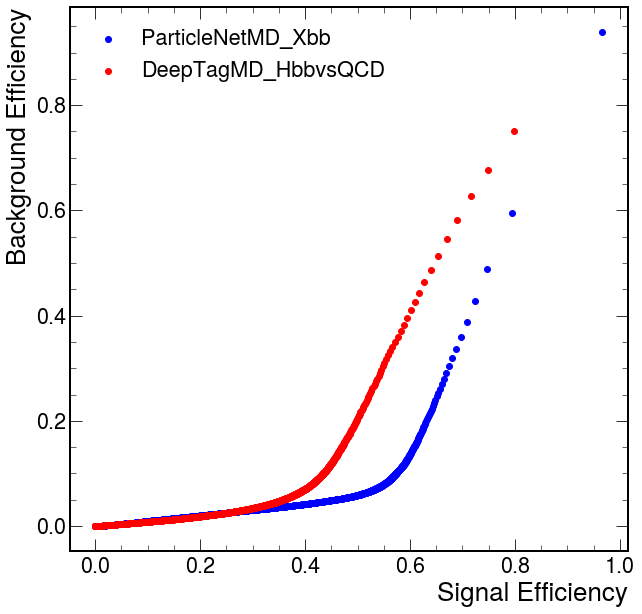

In [20]:
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

fig,ax = plt.subplots()
ax.scatter(sig_eff_PNet,bkg_eff_PNet,color='blue',label='ParticleNetMD_Xbb')
ax.scatter(sig_eff_Deep,bkg_eff_Deep,color='red',label='DeepTagMD_HbbvsQCD')
ax.set_xlabel('Signal Efficiency')
ax.set_ylabel('Background Efficiency')
ax.legend()
plt.show()



In [21]:
signal = dfDeep['process_id'] == -1
sig_df = dfDeep[signal]
bkg_df = dfDeep[~signal]
sig_N = sig_df.shape[0]
bkg_N = bkg_df.shape[0]
print ("sig {} bkg {}".format(sig_N,bkg_N) )

sig 85395 bkg 941525


In [23]:
sig_eff_PNet=[]
sig_eff_Deep=[]
bkg_eff_PNet=[]
bkg_eff_Deep=[]

for i in range (1000):
    PNet_cut = dfPNet['mva_score'] > i/1000
    Deep_cut = dfDeep['mva_score'] > i/1000
    sig_eff_PNet.append(dfPNet[(PNet_cut & signal)].shape[0]/sig_N)
    bkg_eff_PNet.append(dfPNet[(PNet_cut & ~signal)].shape[0]/bkg_N)
    sig_eff_Deep.append(dfDeep[(Deep_cut & signal)].shape[0]/sig_N)
    bkg_eff_Deep.append(dfDeep[(Deep_cut & ~signal)].shape[0]/bkg_N)

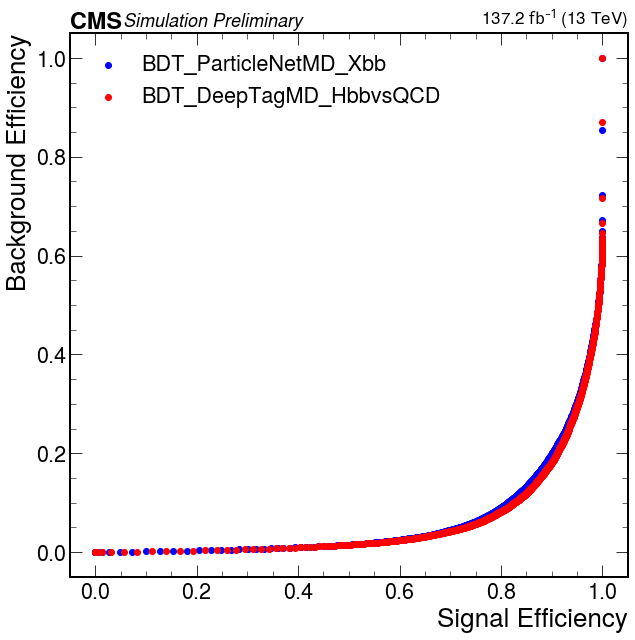

In [28]:
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

fig,ax = plt.subplots()
ax.scatter(sig_eff_PNet,bkg_eff_PNet,color='blue',label='BDT_ParticleNetMD_Xbb')
ax.scatter(sig_eff_Deep,bkg_eff_Deep,color='red',label='BDT_DeepTagMD_HbbvsQCD')
ax.set_xlabel('Signal Efficiency')
ax.set_ylabel('Background Efficiency')
ax.legend()
hep.cms.label(loc=0, data=False, lumi=137.2, fontsize=18)

plt.show()